In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('employee_data.csv')

In [49]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
quit,0
promotion_last_5years,0
department,0
salary,0


In [48]:
df = df[df['promotion_last_5years'].notna()]


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11582 entries, 0 to 11581
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11582 non-null  float64
 1   last_evaluation        11582 non-null  float64
 2   number_project         11582 non-null  int64  
 3   average_montly_hours   11582 non-null  int64  
 4   time_spend_company     11582 non-null  int64  
 5   Work_accident          11582 non-null  int64  
 6   quit                   11582 non-null  int64  
 7   promotion_last_5years  11581 non-null  float64
 8   department             11581 non-null  object 
 9   salary                 11581 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 905.0+ KB


In [50]:
df.shape

(11581, 10)

In [51]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,11581.000000,11581.000000,11581.000000,11581.000000,11581.000000,11581.000000,11581.000000,11581.000000
mean,0.628313,0.716589,3.803039,200.522753,3.304637,0.152664,0.172697,0.013816
std,0.241994,0.168823,1.169774,48.841366,1.207820,0.359679,0.378001,0.116731
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


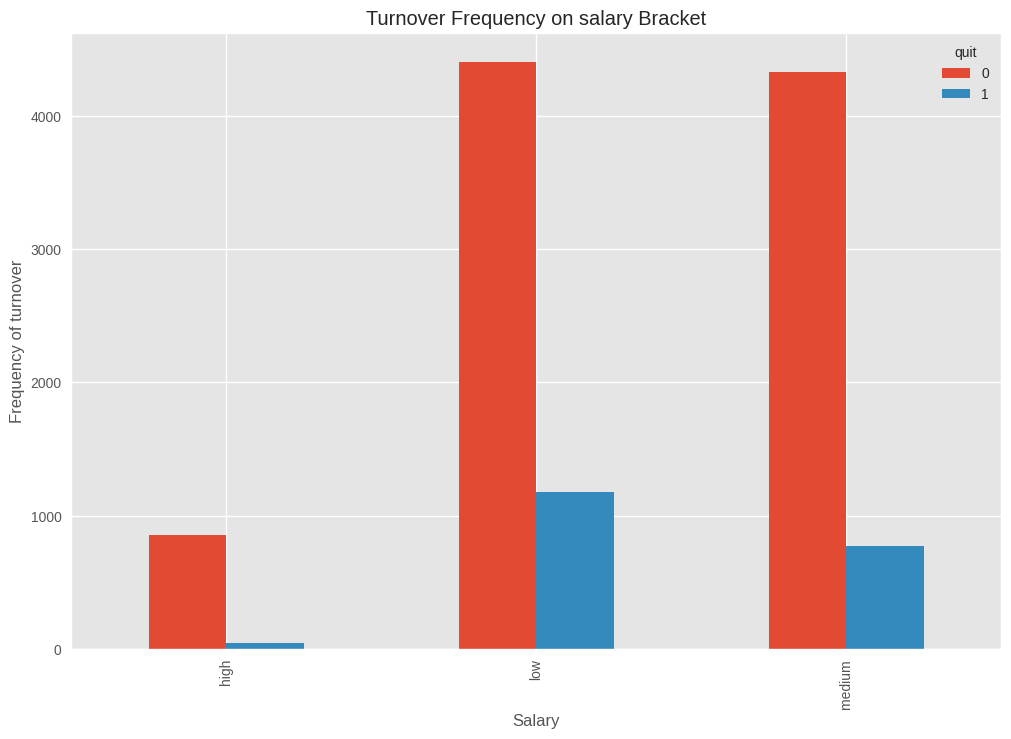

In [52]:
pd.crosstab(df.salary,df.quit).plot(kind='bar')
plt.title("Turnover Frequency on salary Bracket")
plt.xlabel('Salary')
plt.ylabel('Frequency of turnover')
plt.show()

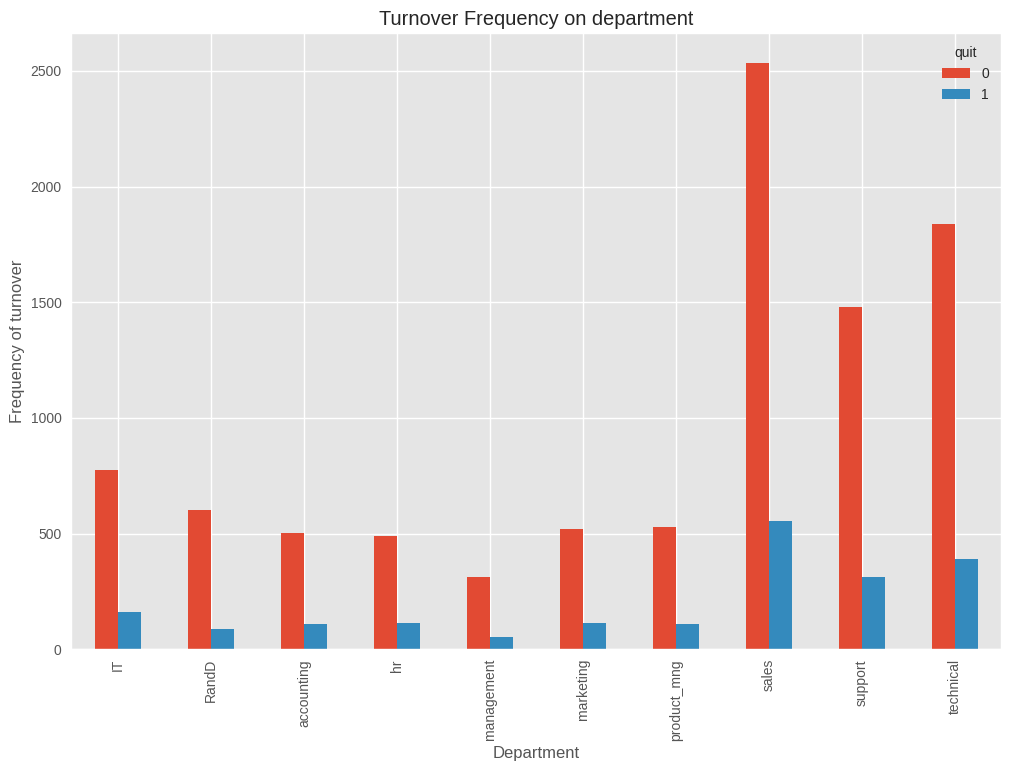

In [53]:
pd.crosstab(df.department,df.quit).plot(kind='bar')
plt.title("Turnover Frequency on department")
plt.xlabel('Department')
plt.ylabel('Frequency of turnover')
plt.show()

In [54]:
cat_vars=['department','salary']
for i in cat_vars:
    cat_list=pd.get_dummies(df[i], prefix=i)
    df=df.join(cat_list)


In [55]:
df.drop(columns=['department','salary'],axis=1,inplace=True)

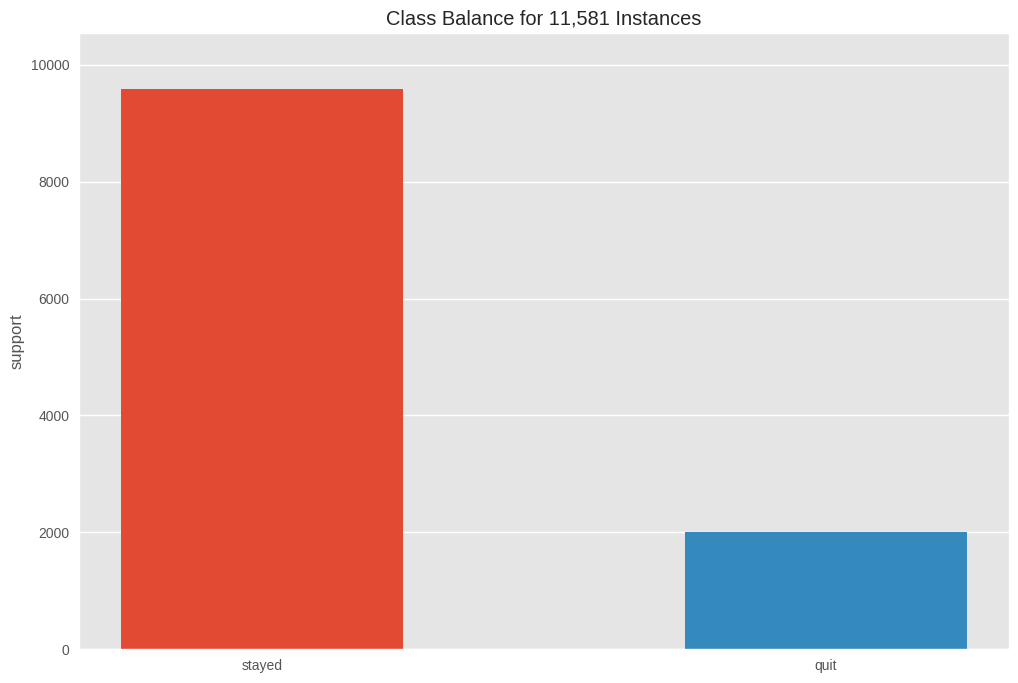

<Axes: title={'center': 'Class Balance for 11,581 Instances'}, ylabel='support'>

In [56]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)
v = ClassBalance(labels=['stayed','quit']).fit(df.quit)
v.show()

In [57]:
x=df.loc[:,df.columns !='quit']
y=df.quit

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,stratify=y)

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [60]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [61]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', random_state=42)  # You can change kernel if needed
}


In [63]:
for name, model in models.items():
    if name in ['K-Nearest Neighbors', 'SVM', 'Logistic Regression']:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    print()
    print("-----------------------------------------------------------")
    print()
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



-----------------------------------------------------------


Decision Tree
Accuracy: 0.9680621493310315
Confusion Matrix:
 [[1873   44]
 [  30  370]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1917
           1       0.89      0.93      0.91       400

    accuracy                           0.97      2317
   macro avg       0.94      0.95      0.94      2317
weighted avg       0.97      0.97      0.97      2317


-----------------------------------------------------------


Random Forest
Accuracy: 0.9857574449719465
Confusion Matrix:
 [[1915    2]
 [  31  369]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1917
           1       0.99      0.92      0.96       400

    accuracy                           0.99      2317
   macro avg       0.99      0.96      0.97      2317
weighted avg       0.99      0.99      0.99      

In [65]:
#| Model                   | Accuracy  | Precision (Quit=1) | Recall (Quit=1) | F1 (Quit=1) |
#| ----------------------- | --------- | ------------------ | --------------- | ----------- |
#| **Random Forest**       | **0.986** | **0.99**           | 0.92            | **0.96**    |
#| **Decision Tree**       | 0.968     | 0.89               | **0.93**        | 0.91        |
#| **SVM**                 | 0.956     | 0.88               | 0.86            | 0.87        |
#| **KNN**                 | 0.954     | 0.86               | 0.88            | 0.87        |
#| **Logistic Regression** | 0.821     | 0.46               | 0.21            | 0.29        |


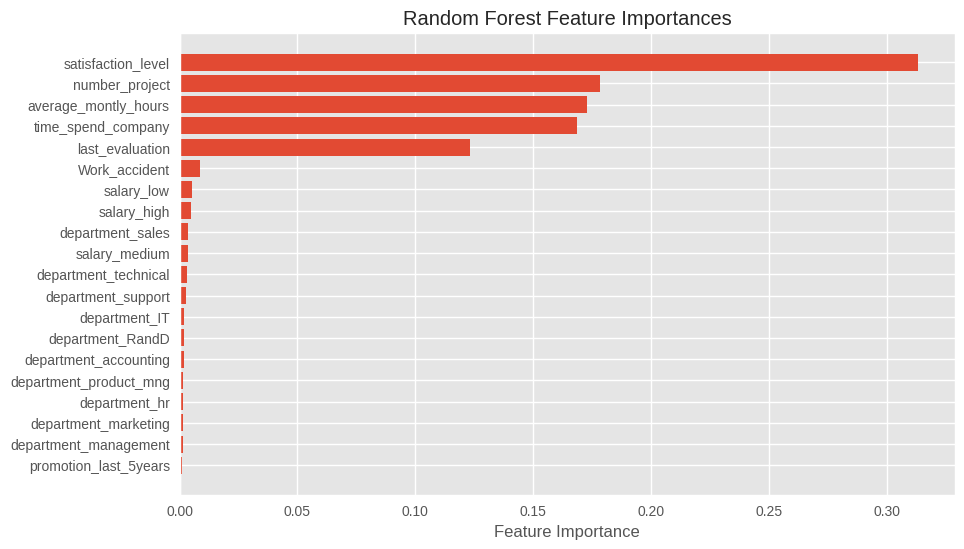

In [67]:
import matplotlib.pyplot as plt

feat_importance = models['Random Forest'].feature_importances_
features = x.columns
sorted_idx = feat_importance.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], feat_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [75]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# For ROC
model_probs = {}
model_accuracies = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_accuracies[name] = accuracy_score(y_test, y_pred)

    # Use probabilities if available, otherwise decision function
    if hasattr(model, "predict_proba"):
        model_probs[name] = model.predict_proba(x_test)[:, 1]
    else:
        model_probs[name] = model.decision_function(x_test)


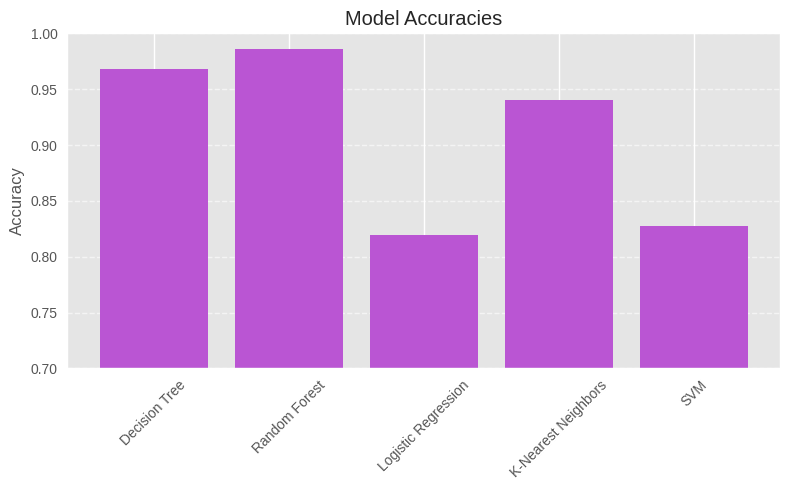

In [76]:
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='mediumorchid')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


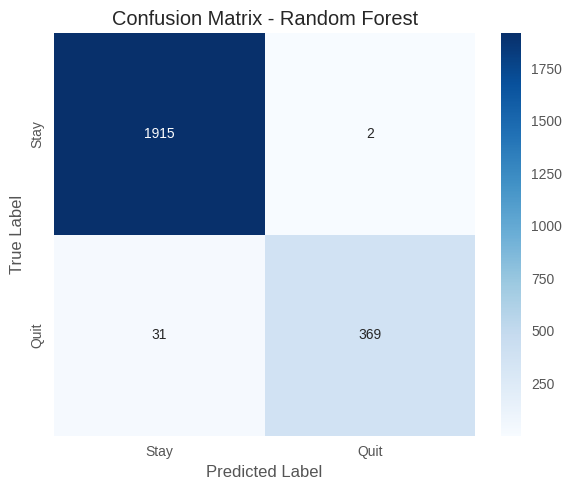

In [78]:
# Predict and get confusion matrix for Random Forest
rf_model = models["Random Forest"]
y_pred_rf = rf_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Quit'], yticklabels=['Stay', 'Quit'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()


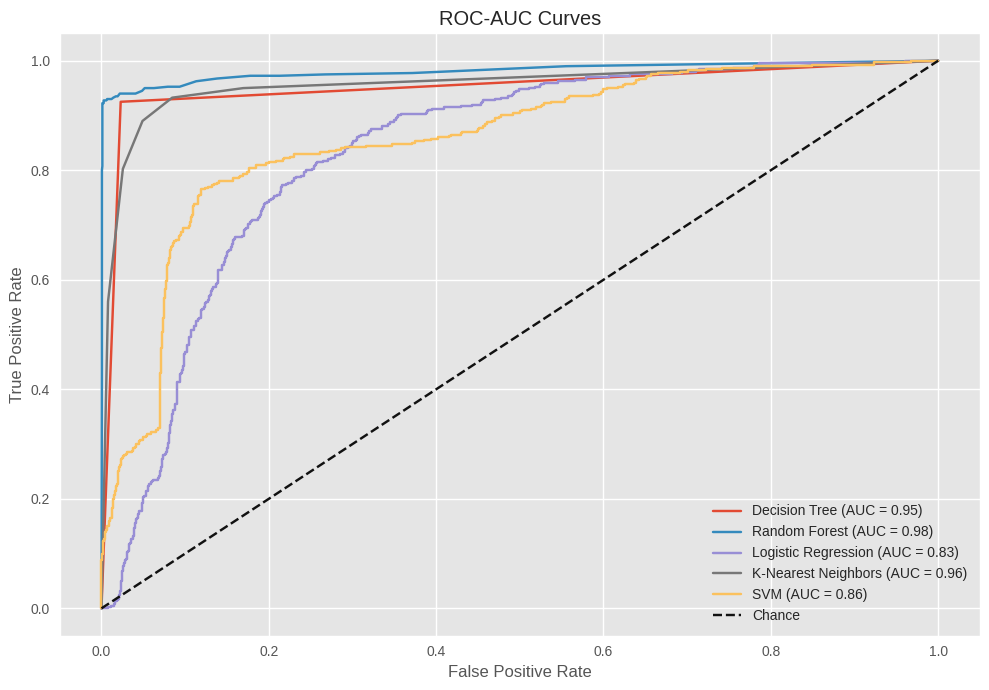

In [79]:
from sklearn.metrics import roc_auc_score

plt.figure(figsize=(10, 7))

for name, probas in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probas)
    auc_score = roc_auc_score(y_test, probas)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [80]:
for name, acc in model_accuracies.items():
    print(f"{name}: Accuracy = {acc:.4f}")


Decision Tree: Accuracy = 0.9681
Random Forest: Accuracy = 0.9858
Logistic Regression: Accuracy = 0.8196
K-Nearest Neighbors: Accuracy = 0.9404
SVM: Accuracy = 0.8274


In [81]:
import joblib
from sklearn.metrics import roc_auc_score

# Find best model by AUC
best_model_name = ""
best_auc = 0
for name, probas in model_probs.items():
    score = roc_auc_score(y_test, probas)
    if score > best_auc:
        best_auc = score
        best_model_name = name

# Save the best model
best_model = models[best_model_name]
joblib.dump(best_model, "best_model.pkl")
print(f"✅ Saved best model: {best_model_name} (AUC = {best_auc:.2f})")


✅ Saved best model: Random Forest (AUC = 0.98)
